# Link Drive and Colab

In [1]:

# this cell enables to link your drive and your colab in order to have acess to the database

try:
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)

  FOLDERNAME = 'Projet_dep'
  %cd /content/gdrive/My\ Drive/$FOLDERNAME
except ImportError:
  pass

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/16TS1RsIeHZ8iSQtU65AMxP3pEU4cwkPx/Projet_dep


# Packages to import


In [2]:
# run this cell if resize-image is not already one of your python packages

pip install python-resize-image 

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import cv2
import numpy as np
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from google.colab.patches import cv2_imshow
import numpy as np
import skimage.io as io
from google.colab import files
from PIL import Image
from resizeimage import resizeimage
import matplotlib.pyplot as plt

# Using GPU

In [4]:
#in the following code, we do x = x.to(device = torch.device('cpu)) for x a variable because the GPU could not support the data volume
#in order to use the GPU, modify your execution type from TPU or None to GPU in 'Exécution'
#Then for each variable x do: x = x.to(device = device) with device defined below

USE_GPU = True
dtype = torch.float # we will be using float throughout this tutorial
device =  torch.device('cuda') if (USE_GPU and torch.cuda.is_available()) else torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 10
print('using device:', device)

using device: cpu


# Recovery of the data base

In [7]:
# Here, we take ratio= 4 in order to have a resolution of 128x128 but with more RAM, one could take ratio = 1 to have same resolution as the original images
# if applicable, no need to resize the data and just use the cell below this one

folder_path_img = "image_db/"
folder_path_label = "label_db/"
percentage = 1. #percentage of data taken; here we take all the 1145 images and labels created
N = 1145
ratio = 4
size = int(512/ratio)
TAILLE = [size,size]
X = np.zeros((int(N*percentage), size, size, 3), dtype=np.uint8)
Y = np.zeros((int(N*percentage), 8, size, size), dtype=np.bool)
n = int(int(N*percentage)/5)

## recovery of the image and the label

for i in range(1,n+1):
    img_name = "X" + str(i) + ".jpg"
    label_name = "label" + str(i) + ".npy"
    img = Image.open(folder_path_img + img_name)
    label = np.load(folder_path_label + label_name)
    keep_label = np.asarray(label)
    new_label = []
  
## resizing to the wanted resolution size x size

    for k in range(8):
      abs_zero, ord_zero = np.nonzero(label[k])
      lab = np.array(resizeimage.resize_thumbnail(Image.fromarray(keep_label[k]), TAILLE)) #resize of the label to a resolution size x size
      for j in range(len(abs_zero)): #we keep the original special pixels in the resized label
        abs = int(abs_zero[j]/ratio)
        ord = int(ord_zero[j]/ratio)
        lab[abs][ord] = True
      new_label.append(lab)
    new_label = np.asarray(new_label)
    X[i-1] = np.asarray(resizeimage.resize_thumbnail(img, TAILLE)) #resized image 
    Y[i-1] = new_label #resized label


## recovery of the flipped image and the label

for i in range(1,n+1):
    img_name = "X" + str(i) + "_flipped.jpg"
    label_name = "label" + str(i) + "_flipped.npy"
    img = Image.open(folder_path_img + img_name)
    label = np.load(folder_path_label + label_name)
    keep_label = np.asarray(label)
    new_label = []

## resizing to the wanted resolution size x size

    for k in range(8):
      abs_zero, ord_zero = np.nonzero(label[k])
      lab = np.array(resizeimage.resize_thumbnail(Image.fromarray(keep_label[k]), TAILLE))
      for j in range(len(abs_zero)):
        abs = int(abs_zero[j]/ratio)
        ord = int(ord_zero[j]/ratio)
        lab[abs][ord] = True
      new_label.append(lab)
    new_label = np.asarray(new_label)
    X[i-1+n] = np.asarray(resizeimage.resize_thumbnail(img, TAILLE))
    Y[i-1+n] = new_label


## recovery of the rotated image and the label

for i in range(1,n+1):
    img_name = "X" + str(i) + "_rotated.jpg"
    label_name = "label" + str(i) + "_rotated.npy"
    img = Image.open(folder_path_img + img_name)
    label = np.load(folder_path_label + label_name)
    keep_label = np.asarray(label)
    new_label = []

## resizing to the wanted resolution size x size

    for k in range(8):
      abs_zero, ord_zero = np.nonzero(label[k])
      lab = np.array(resizeimage.resize_thumbnail(Image.fromarray(keep_label[k]), TAILLE))
      for j in range(len(abs_zero)):
        abs = int(abs_zero[j]/ratio)
        ord = int(ord_zero[j]/ratio)
        lab[abs][ord] = True
      new_label.append(lab)
    new_label = np.asarray(new_label)
    X[i-1+2*n] = np.asarray(resizeimage.resize_thumbnail(img, TAILLE))
    Y[i-1+2*n] = new_label


## recovery of the noisy image and the label

for i in range(1,n+1):
    img_name = "X" + str(i) + "_noisy.jpg"
    label_name = "label" + str(i) + "_noisy.npy"
    img = Image.open(folder_path_img + img_name)
    label = np.load(folder_path_label + label_name)
    keep_label = np.asarray(label)
    new_label = []

## resizing to the wanted resolution size x size

    for k in range(8):
      abs_zero, ord_zero = np.nonzero(label[k])
      lab = np.array(resizeimage.resize_thumbnail(Image.fromarray(keep_label[k]), TAILLE))
      for j in range(len(abs_zero)):
        abs = int(abs_zero[j]/ratio)
        ord = int(ord_zero[j]/ratio)
        lab[abs][ord] = True
      new_label.append(lab)
    new_label = np.asarray(new_label)
    X[i-1+3*n] = np.asarray(resizeimage.resize_thumbnail(img, TAILLE))
    Y[i-1+3*n] = new_label


## recovery of the shifted image and the label

for i in range(1,n+1):
    img_name = "X" + str(i) + "_shifted.jpg"
    label_name = "label" + str(i) + "_shifted.npy"
    img = Image.open(folder_path_img + img_name)
    label = np.load(folder_path_label + label_name)
    keep_label = np.asarray(label)
    new_label = []
    
## resizing to the wanted resolution size x size

    for k in range(8):
      abs_zero, ord_zero = np.nonzero(label[k])
      lab = np.array(resizeimage.resize_thumbnail(Image.fromarray(keep_label[k]), TAILLE))
      for j in range(len(abs_zero)):
        abs = int(abs_zero[j]/ratio)
        ord = int(ord_zero[j]/ratio)
        lab[abs][ord] = True
      new_label.append(lab)
    new_label = np.asarray(new_label)
    X[i-1+4*n] = np.asarray(resizeimage.resize_thumbnail(img, TAILLE))
    Y[i-1+4*n] = new_label

In [98]:
# in this cell, we verify that the data base (eventually resized) corresponds to the original one in Drive


x1, y1 = X[0], Y[0]
x2, y2 = X[20], Y[20]
print(x1.shape,x2.shape,y1.shape,y2.shape) #verification that the dimensions are the same after resizing
folder_path_img = "image_db/"
folder_path_label = "label_db/"
img_name = "X" + str(1) + ".jpg"
label_name = "label" + str(1) + ".npy"
img = Image.open(folder_path_img + img_name)
label = np.load(folder_path_label + label_name)
label = np.asarray(label)
print(np.count_nonzero(y1[0]), np.count_nonzero(label[0])) #verification that the label are correctly resized

(128, 128, 3) (128, 128, 3) (8, 128, 128) (8, 128, 128)
3 3


In [8]:
print(X.shape, Y.shape)  # verification that all the data wanted have been recovered

(1145, 128, 128, 3) (1145, 8, 128, 128)


# functions to visualize labels

In [132]:
#useful function for visualisation of the labels

def float_to_uint8(img, multiply_channel=False):
  if multiply_channel:
    return (255*np.stack((img,)*3, axis=-1)).astype(np.uint8)
  return (255*img).astype(np.uint8)

def print_heatmap(heatmap):
  io.imshow(cv2.GaussianBlur(float_to_uint8(heatmap),(21,21),5.0))

# Images format correction


In [10]:
# We have a data base of images (size, size, 3)  and we want images to (3, size, size)
X = np.moveaxis(X, 3, 1)
X.shape #verification that the dimensions are the one wanted

(1145, 3, 128, 128)

# Creation of the loaders: batch of size 64

# Total loaders

In [11]:
# loader total
loader_train = []
p = np.random.permutation(n*5)
for i in range(15):
  loader_train.append([torch.from_numpy(X[p[i*64:(i+1)*64]]), torch.from_numpy(Y[p[i*64:(i+1)*64]])])

In [12]:
# loader total
loader_val = []
for i in range(3):
  loader_val.append([torch.from_numpy(X[p[-(i+1)*64-1:-i*64-1]]), torch.from_numpy(Y[p[-(i+1)*64-1:-i*64-1]])])

# Partial loaders

In [10]:
#loader partiel
partial_loader_train = []
p = np.random.permutation(n*5)
for i in range(2):
  loader_train.append([torch.from_numpy(X[p[i*64:(i+1)*64]]), torch.from_numpy(Y[p[i*64:(i+1)*64]])])

In [11]:
partial_loader_val = []
for i in range(2):
  loader_val.append([torch.from_numpy(X[p[-(i+1)*64-1:-i*64-1]]), torch.from_numpy(Y[p[-(i+1)*64-1:-i*64-1]])])

In [105]:
#verification of the dimension 
for x,y in loader_train:
  pass
print(x.shape,y.shape)

torch.Size([64, 3, 128, 128]) torch.Size([64, 8, 128, 128])


# Training functions for the neural network

In [1]:
def check_loader_loss(loader, model):
    loader_loss = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=torch.device('cpu'), dtype=dtype)  # move to CPU
            y = y.to(device=torch.device('cpu'), dtype=dtype)  # to move it to GPU, replace "torch.device('cpu')" by "device"
            # Forward pass: compute scores and loss
            scores = model(x)
            loss_function = torch.nn.BCEWithLogitsLoss()
            loss = loss_function(scores,y)
            loader_loss += loss
        print('mean loss on the loader {}'.format(loader_loss))

In [14]:
def run_val(loader, model):
    model.eval()
    loss = None
    x_list = []
    y_list = []
    with torch.no_grad():
        for t, (x, y) in enumerate(loader):
            x = x.to(device=torch.device('cpu'), dtype=dtype)  # move to CPU
            y = y.to(device=torch.device('cpu'), dtype=dtype)  # to move it to GPU, replace "torch.device('cpu')" by "device"
            x_list.append(x)
            y_list.append(y)
            del(x); del(y)   #delete the variables to minimize RAM occupation
        # Forward pass: compute scores and loss
        scores = model(torch.cat(x_list))
        loss_function = torch.nn.BCEWithLogitsLoss()
        loss = loss_function(scores, torch.cat(y_list))
        del(x_list); del(y_list)
    return loss

In [15]:
def train_module(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: the loss values at specific iterations
    """
    losses = {}
    losses_val = {}
    for e in range(epochs):
        print('Epoch {}'.format(e))
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=torch.device('cpu'), dtype=dtype)  # move to CPU
            y = y.to(device=torch.device('cpu'), dtype=dtype)  # to move it to GPU, replace "torch.device('cpu')" by "device"
            # Forward pass: compute scores and loss
            scores = model(x)
            scores = scores.to(device=torch.device('cpu'), dtype = dtype)
            loss_function = torch.nn.BCEWithLogitsLoss()
            loss = loss_function(scores,y)
            del(x); del(y) #delete the variables to minimize RAM occupation

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            #plot the actual loss and the mean loss on loader every 10 iteration
            if t % print_every == 0: 
                print('Iteration %d, loss = %.4f' % (t, loss.item())) #loss for the actual prediction
                losses[e * len(loader_train) + t] = loss.item()
                check_loader_loss(loader_val, model) #mean loss on the loader
                print()
        
        loss_val = run_val(loader_val, model) # loss on validation set
        losses_val[(e + 1) * len(loader_train)] = loss_val.item()

    return losses, losses_val

# Neural network architecture

In [16]:
class Block(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv1 = nn.Conv2d(in_ch, out_ch, 3, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_ch, out_ch, 3, padding=1)

    def forward(self, x):
        return self.conv2(self.relu(self.conv1(x)))


class Encoder(nn.Module):
    def __init__(self, chs=(3, 64, 128, 256, 512, 1024)):
        super().__init__()
        self.enc_blocks = nn.ModuleList([Block(chs[i], chs[i + 1]) for i in range(len(chs) - 1)])
        self.pool = nn.MaxPool2d(2)

    def forward(self, x):
        ftrs = []
        for block in self.enc_blocks:
            x = block(x)
            ftrs.append(x)
            x = self.pool(x)
        return ftrs


class Decoder(nn.Module):
    def __init__(self, chs=(1024, 512, 256, 128, 64)):
        super().__init__()
        self.chs = chs
        self.upconvs = nn.ModuleList([nn.ConvTranspose2d(chs[i], chs[i + 1], 2, 2) for i in range(len(chs) - 1)])
        self.dec_blocks = nn.ModuleList([Block(chs[i], chs[i + 1]) for i in range(len(chs) - 1)])

    def forward(self, x, encoder_features):
        for i in range(len(self.chs) - 1):
            x = self.upconvs[i](x)
            enc_ftrs = self.crop(encoder_features[i], x)
            x = torch.cat([x, enc_ftrs], dim=1)
            x = self.dec_blocks[i](x)
        return x

    def crop(self, enc_ftrs, x):
        _, _, H, W = x.shape
        enc_ftrs = torchvision.transforms.CenterCrop([H, W])(enc_ftrs)
        return enc_ftrs


class UNet(nn.Module):
    def __init__(self, enc_chs=(3, 64, 128, 256, 512, 1024), dec_chs=(1024, 512, 256, 128, 64), num_class=8):
        super().__init__()
        self.encoder = Encoder(enc_chs)
        self.decoder = Decoder(dec_chs)
        self.head = nn.Conv2d(dec_chs[-1], num_class, 1)

    def forward(self, x):
        enc_ftrs = self.encoder(x)
        out = self.decoder(enc_ftrs[::-1][0], enc_ftrs[::-1][1:])
        out = self.head(out)
        return out

# Model training

In [17]:
learning_rate = 3e-3

model = UNet()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_train, loss_val = train_module(model, optimizer, epochs=3)

Epoch 0
Iteration 0, loss = 1.0974
mean loss on the loader 1.2944035530090332

Iteration 10, loss = 0.1055
mean loss on the loader 0.288703978061676

Epoch 1
Iteration 0, loss = 0.0763
mean loss on the loader 0.22236531972885132

Iteration 10, loss = 0.0563
mean loss on the loader 0.15574806928634644

Epoch 2
Iteration 0, loss = 0.0458
mean loss on the loader 0.13615649938583374

Iteration 10, loss = 0.0392
mean loss on the loader 0.10857298970222473



# Loss visualisation

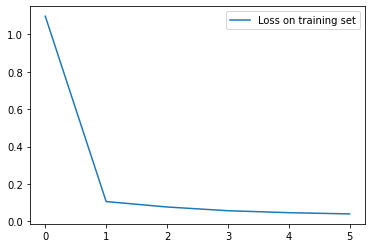

In [31]:
# training
err_train = [d for d in loss_train.values()]
plt.plot(range(6), err_train, label = 'Loss on training set')
plt.legend()
plt.show()

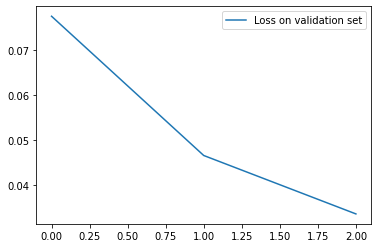

In [30]:
# validation 
import matplotlib.pyplot as plt
err_val = [d for d in loss_val.values()]
plt.plot(range(3), err_val, label = 'Loss on validation set')
plt.legend()
plt.show()

# Prediction visualisation

In [32]:
#verification of the dimension of prediction

batch_data = loader_val[0][0]
batch_data = batch_data.to(device=torch.device('cpu'), dtype = dtype)
batch_prediction = model(batch_data)
print(batch_prediction.shape)
x = X[0]
x = np.moveaxis(x, 0, 2)
y = Y[0][0] #label 0 de la premiere image

torch.Size([64, 8, 128, 128])


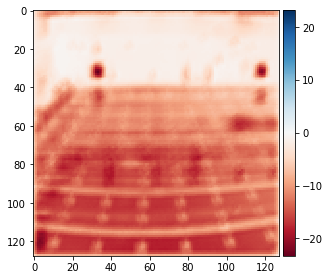

In [43]:
#we visualise one label of the prediction
pred = batch_prediction[0][7] #prediction du label 7 de l'image 1
pred = pred.detach().numpy()
io.imshow(pred)

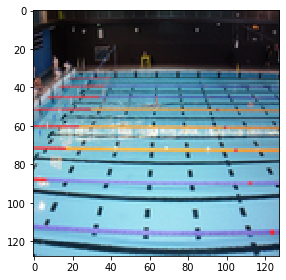

In [59]:
#image 1
x = X[1]
x = np.moveaxis(x, 0, 2)
io.imshow(x)

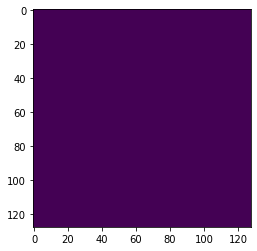

In [50]:
#label 7 of image 1
y = Y[0][7] #label 0 de la premiere image
plt.imshow(y)